In [ ]:
!pip install -q hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 26.9 MB/s eta 0:00:00


In [ ]:
!pip install diffprivlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
!pip install ucimlrepo

# Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import hvplot.pandas
import seaborn as sns
import time, sys, os, re
# Test train Split, Feature selection
from sklearn.model_selection import train_test_split
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler , StandardScaler

#metrics
from sklearn.metrics import f1_score , recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, classification_report, roc_auc_score

#Classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn import utils

from imblearn.over_sampling import SMOTE

# uci ml repo
from ucimlrepo import fetch_ucirepo

# Import Dataset

In [ ]:
# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

In [ ]:
# Data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

In [ ]:
#features
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [ ]:
#Labels
y.head()

,num
0,0
1,2
2,1
3,0
4,0


# View Metadata and variable information

In [ ]:
# Metadata
heart_disease.metadata

{'uci_id': 45,
 'name': 'Heart Disease',
 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease',
 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv',
 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 303,
 'num_features': 13,
 'feature_types': ['Categorical', 'Integer', 'Real'],
 'demographics': ['Age', 'Sex'],
 'target_col': ['num'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1989,
 'last_updated': 'Fri Nov 03 2023',
 'dataset_doi': '10.24432/C52P4X',
 'creators': ['Andras Janosi',
  'William Steinbrunn',
  'Matthias Pfisterer',
  'Robert Detrano'],
 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.',
  'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M.

In [ ]:
"""
The metadata for the Heart Disease dataset from the UCI Machine Learning Repository includes the
following summarized information:

Dataset ID and Name: The dataset's unique identifier is 45, and it is named "Heart Disease".

Data Composition: It consists of 4 databases from Cleveland, Hungary, Switzerland, and the VA Long
Beach, encompassing health and medicine data for classification tasks.

Features and Instances: The dataset has 303 instances and 13 features out of 76 original attributes,
focusing on multivariate characteristics with features including categorical, integer, and real types,
and demographics like age and sex.

Target and Missing Values: The target column is 'num', indicating the presence of heart disease with
different severity levels. The dataset includes missing values represented as 'NaN'.

Creation and Update: It was created in 1989 and last updated on November 3, 2023.

Variables: Key variables include age, sex, chest pain type, blood pressure, cholesterol,
fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved,
exercise-induced angina, and others related to heart function and health.

The "num" variable, which is the target column, refers to the angiographic disease status,
with values ranging from 0 (less than 50% diameter narrowing, indicating no or less severe disease)
to 4 (more than 50% diameter narrowing in any major vessel, indicating more severe disease).
This indicates different types of heart disease severity rather than specific conditions.
For detailed types of heart diseases, medical literature or a healthcare professional should be
consulted, as the dataset itself does not define the specific types of heart disease beyond the
severity of arterial narrowing.
"""

'\nThe metadata for the Heart Disease dataset from the UCI Machine Learning Repository includes the\nfollowing summarized information:\n\nDataset ID and Name: The dataset\'s unique identifier is 45, and it is named "Heart Disease".\n\nData Composition: It consists of 4 databases from Cleveland, Hungary, Switzerland, and the VA Long\nBeach, encompassing health and medicine data for classification tasks.\n\nFeatures and Instances: The dataset has 303 instances and 13 features out of 76 original attributes,\nfocusing on multivariate characteristics with features including categorical, integer, and real types,\nand demographics like age and sex.\n\nTarget and Missing Values: The target column is \'num\', indicating the presence of heart disease with\ndifferent severity levels. The dataset includes missing values represented as \'NaN\'.\n\nCreation and Update: It was created in 1989 and last updated on November 3, 2023.\n\nVariables: Key variables include age, sex, chest pain type, blood pr

In [ ]:
# Variable information
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [ ]:
vars = heart_disease.variables
vars[["name", "role", "type"]]

,name,role,type
0,age,Feature,Integer
1,sex,Feature,Categorical
2,cp,Feature,Categorical
3,trestbps,Feature,Integer
4,chol,Feature,Integer
5,fbs,Feature,Categorical
6,restecg,Feature,Categorical
7,thalach,Feature,Integer
8,exang,Feature,Categorical
9,oldpeak,Feature,Integer


# Data info and descriptive statistics

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [ ]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [ ]:
y.nunique()

num    5
dtype: int64

# Data Cleaning

1. Remove Null Values
2. Outlier analysis with IQR
3. Remove duplicates

In [ ]:
# # Data Cleaning

# Check for missing values
missing_values = X.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64


In [ ]:
print(X.shape, y.shape)

(303, 13) (303, 1)


In [ ]:
# Make a copy of the datasets
X_copy = X.copy()
y_copy = y.copy()

# Find indices where there are NaN values in X_copy
nan_indices = X_copy[X_copy.isna().any(axis=1)].index

# Drop these indices from both X_copy and y_copy
X_copy.drop(nan_indices, inplace=True)
y_copy.drop(nan_indices, inplace=True)

In [ ]:
X = X_copy.copy()
y = y_copy.copy()

In [ ]:
numerical_features = vars[vars['type'] == 'Integer']['name'].values.tolist()
numerical_features = [x for x in numerical_features if x != 'num']
numerical_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

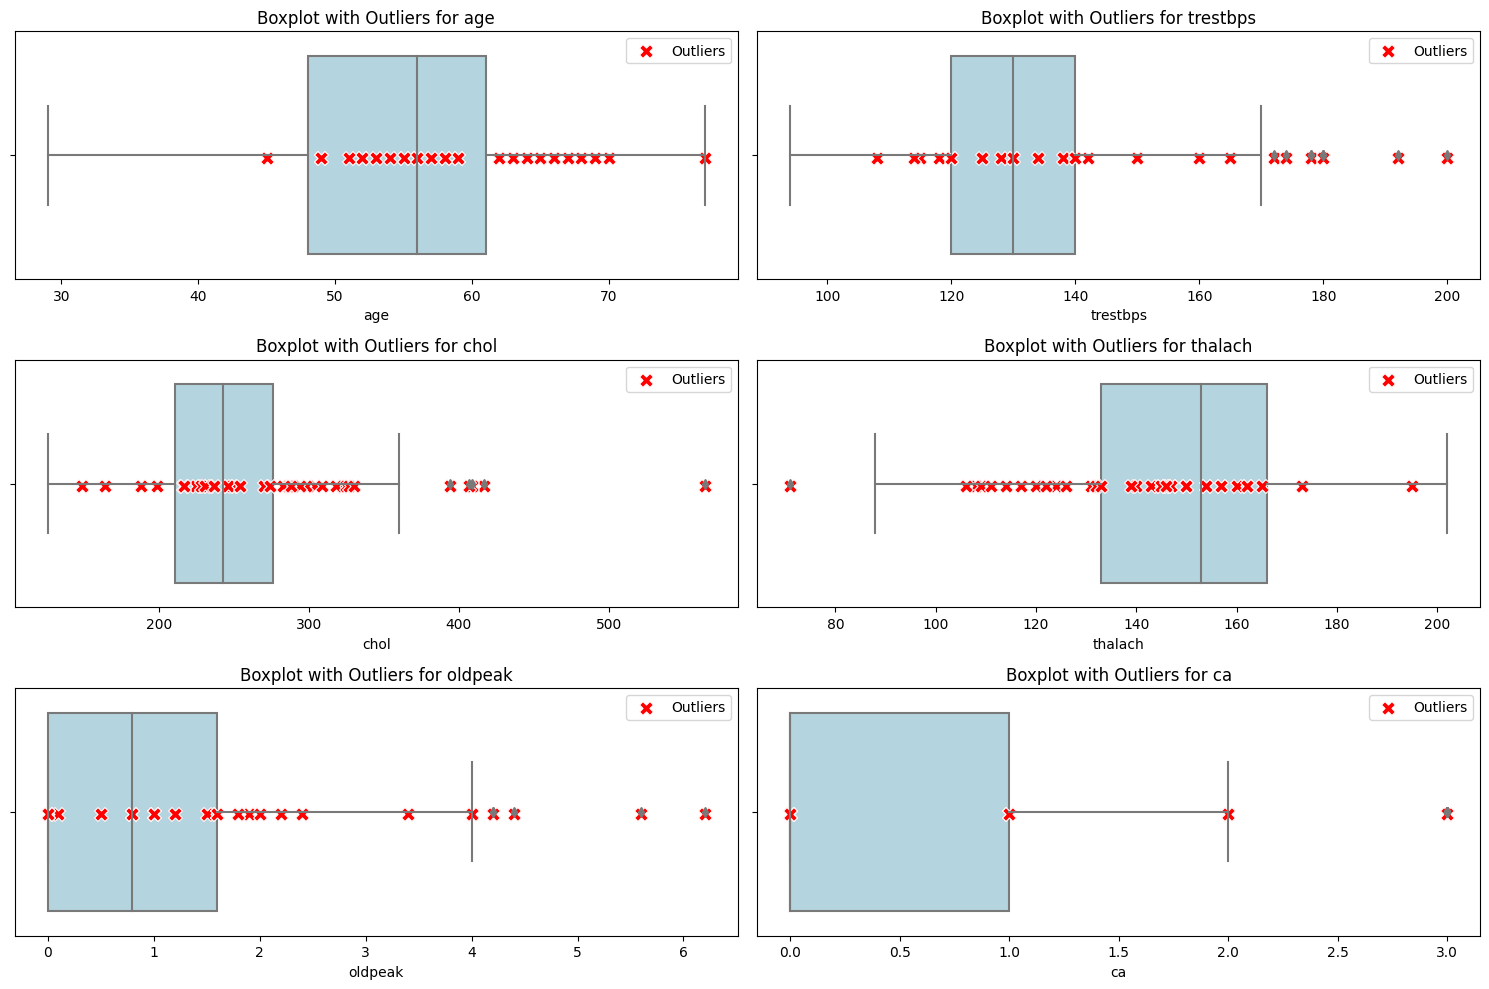

In [ ]:
# Corrected function to detect outliers using IQR
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    multiplier = 1.5
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

# Applying the function to each numerical feature
outlier_indices = []
for feature in numerical_features:
    outlier_indices.extend(detect_outliers(X, feature).index.tolist())

# Selecting the important data points - the unique outliers across all numerical features
# Converting the set to list as per the new pandas future version guidelines
important_points = X.loc[list(set(outlier_indices))]

# Plotting the boxplots with the outliers
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=X[col], color='lightblue', showfliers=True)
    # (since boxplot's y is 0 for all points) for the 'y' value.
    scatter_y = np.full(shape=len(important_points[col]), fill_value=0.01)
    # Overlaying the important data points
    sns.scatterplot(x=important_points[col],
                    y=scatter_y,
                    color='red',
                    s=100,
                    label='Outliers',
                    marker='X')
    plt.title(f'Boxplot with Outliers for {col}')

plt.tight_layout()

# Placing the legend on the first subplot for clarity
plt.subplot(3, 2, 1)
plt.legend()
plt.show()

In [ ]:
# Check for duplicate values
duplicates = X.duplicated()
print(duplicates)
# Remove duplicate values
X = X.drop_duplicates()

0      False
1      False
2      False
3      False
4      False
       ...  
297    False
298    False
299    False
300    False
301    False
Length: 297, dtype: bool


# Convert Multi Class label to Binary Class

In [ ]:
"""
the Heart Disease dataset from the UCI Machine Learning Repository is often used in binary classification settings, despite originally having multiple classes (0, 1, 2, 3, 4).
In such cases, the target variable is typically converted to binary as follows:

1. Class 0 (originally indicating no presence of heart disease) is kept as 0.
2. Classes 1, 2, 3, 4 (originally indicating different degrees of heart disease) are combined into a single class, often labeled as 1.

This conversion essentially turns the problem into a binary classification task where the objective is to predict the presence or absence of heart disease.
"""

'\nthe Heart Disease dataset from the UCI Machine Learning Repository is often used in binary classification settings, despite originally having multiple classes (0, 1, 2, 3, 4). \nIn such cases, the target variable is typically converted to binary as follows:\n\n1. Class 0 (originally indicating no presence of heart disease) is kept as 0.\n2. Classes 1, 2, 3, 4 (originally indicating different degrees of heart disease) are combined into a single class, often labeled as 1.\n\nThis conversion essentially turns the problem into a binary classification task where the objective is to predict the presence or absence of heart disease.\n'

In [ ]:
y_binary = y.copy()
y_binary[y_binary > 0] = 1

In [ ]:
X.shape, y_binary.shape

((297, 13), (297, 1))

In [ ]:
# Combining features and target for pairwise analysis
combined_data = pd.concat([X, y_binary], axis=1)
combined_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# Test Train Split

In [ ]:
w_p = combined_data.num.value_counts()[0] / combined_data.shape[0]
w_n = combined_data.num.value_counts()[1] / combined_data.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.5387205387205387
Weight of negative values 0.4612794612794613


In [ ]:
train, test = train_test_split(combined_data, test_size=0.20, random_state=42)

print(train.shape)
print(test.shape)

(237, 14)
(60, 14)


In [ ]:
combined_data.to_csv("hearts_disease.csv")

# Standardizing the data

In [ ]:
X_train, y_train = train.drop('num', axis=1), train.num
X_test, y_test = test.drop('num', axis=1), test.num

In [ ]:
pd.set_option('display.max_rows', None)
print(X_train.dtypes)
pd.reset_option('display.max_rows')

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
dtype: object


In [ ]:
print(y_train.dtypes)

int64


In [ ]:
X_train_unscaled = X_train.copy()
X_test_unscaled = X_test.copy()

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [ ]:
X_train_unscaled = np.array(X_train_unscaled).astype(np.float32)
X_test_unscaled = np.array(X_test_unscaled).astype(np.float32)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_train_unscaled.shape, X_test_unscaled.shape

((237, 13), (237,), (60, 13), (60,), (237, 13), (60, 13))

# SMOTE - for balancing the dataset

In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now you can check the balance of the classes
unique, counts = np.unique(y_train, return_counts=True)
print("Before SMOTE:", dict(zip(unique, counts)))

unique_resampled, counts_resampled = np.unique(y_train_resampled, return_counts=True)
print("After SMOTE:", dict(zip(unique_resampled, counts_resampled)))

Before SMOTE: {0.0: 124, 1.0: 113}
After SMOTE: {0.0: 124, 1.0: 124}


# General Ml Models : RandomForest , Gradient Boosting, XGBoost - Original Imbalanced Dataset

In [ ]:
# create model instance
xgb = XGBClassifier()
# fit model
xgb.fit(X_train, y_train)
# make predictions
xgb_preds = xgb.predict(X_test)

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [ ]:
xgb_preds.shape, gb_preds.shape, rf_preds.shape, y_test.shape

((60,), (60,), (60,), (60,))

              Model  F1 Score  Precision    Recall  Accuracy  AUC Score
0               XGB  0.807692   0.750000  0.875000  0.833333   0.840278
1  GradientBoosting  0.745098   0.703704  0.791667  0.783333   0.784722
2      RandomForest  0.791667   0.791667  0.791667  0.833333   0.826389


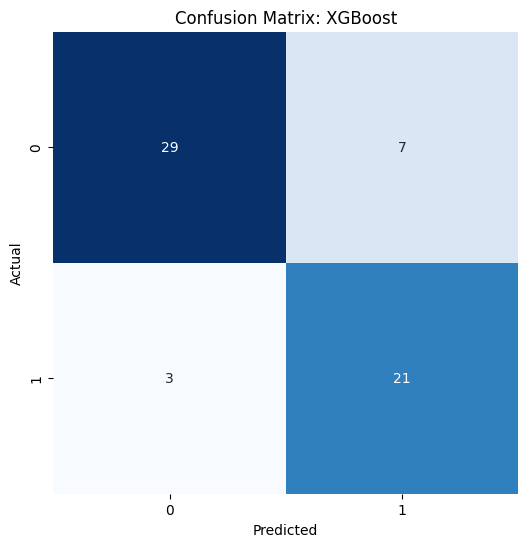

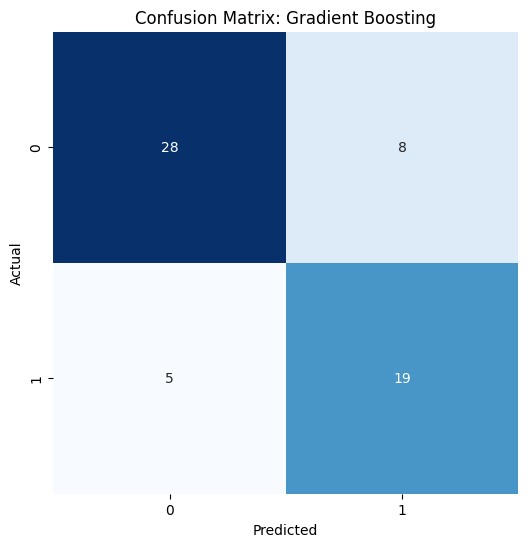

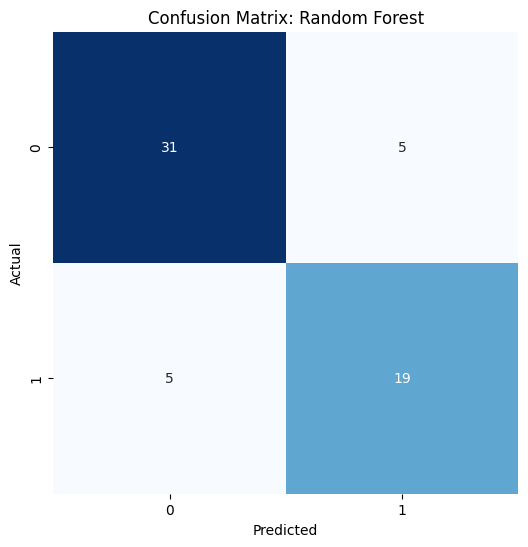

In [ ]:
# Create a dictionary to hold the metrics
model_metrics = {
    'Model': ['XGB', 'GradientBoosting', 'RandomForest'],
    'F1 Score': [],
    'Precision': [],
    'Recall': [],
    'Accuracy': [],
    'AUC Score': []
}

# List of predictions for iteration
predictions = [xgb_preds, gb_preds, rf_preds]

# Calculate metrics and classification reports
classification_reports = []

for i, preds in enumerate(predictions):
    model_metrics['F1 Score'].append(f1_score(y_test, preds))
    model_metrics['Precision'].append(precision_score(y_test, preds))
    model_metrics['Recall'].append(recall_score(y_test, preds))
    model_metrics['Accuracy'].append(accuracy_score(y_test, preds))
    # find area under curve score
    auc = roc_auc_score(y_test, preds)
    model_metrics['AUC Score'].append(auc)



    # Save the classification report for each model
    report = classification_report(y_test, preds, output_dict=True)
    classification_reports.append(report)

# Convert metrics dictionary to DataFrame
metrics_df_Imb = pd.DataFrame(model_metrics)

# Save classification reports into separate variables
xgb_report, gb_report, rf_report = classification_reports

# Print the DataFrame of metrics
print(metrics_df_Imb)

# Plot heatmaps for the confusion matrices
models = [xgb, gb, rf]
model_names = ['XGBoost', 'Gradient Boosting', 'Random Forest']

for i, model in enumerate(models):
    preds = predictions[i]
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {model_names[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [ ]:
for i in classification_reports:
  print(i)
  print()
  print()

{'0.0': {'precision': 0.90625, 'recall': 0.8055555555555556, 'f1-score': 0.8529411764705882, 'support': 36}, '1.0': {'precision': 0.75, 'recall': 0.875, 'f1-score': 0.8076923076923077, 'support': 24}, 'accuracy': 0.8333333333333334, 'macro avg': {'precision': 0.828125, 'recall': 0.8402777777777778, 'f1-score': 0.8303167420814479, 'support': 60}, 'weighted avg': {'precision': 0.84375, 'recall': 0.8333333333333334, 'f1-score': 0.834841628959276, 'support': 60}}


{'0.0': {'precision': 0.8484848484848485, 'recall': 0.7777777777777778, 'f1-score': 0.8115942028985507, 'support': 36}, '1.0': {'precision': 0.7037037037037037, 'recall': 0.7916666666666666, 'f1-score': 0.7450980392156864, 'support': 24}, 'accuracy': 0.7833333333333333, 'macro avg': {'precision': 0.7760942760942762, 'recall': 0.7847222222222222, 'f1-score': 0.7783461210571185, 'support': 60}, 'weighted avg': {'precision': 0.7905723905723906, 'recall': 0.7833333333333333, 'f1-score': 0.784995737425405, 'support': 60}}


{'0.0': {

In [ ]:
classification_reports[0]

{'0.0': {'precision': 0.90625,
  'recall': 0.8055555555555556,
  'f1-score': 0.8529411764705882,
  'support': 36},
 '1.0': {'precision': 0.75,
  'recall': 0.875,
  'f1-score': 0.8076923076923077,
  'support': 24},
 'accuracy': 0.8333333333333334,
 'macro avg': {'precision': 0.828125,
  'recall': 0.8402777777777778,
  'f1-score': 0.8303167420814479,
  'support': 60},
 'weighted avg': {'precision': 0.84375,
  'recall': 0.8333333333333334,
  'f1-score': 0.834841628959276,
  'support': 60}}

In [ ]:
metrics_df_Imb

,Model,F1 Score,Precision,Recall,Accuracy,AUC Score
0,XGB,0.807692,0.750000,0.875000,0.833333,0.840278
1,GradientBoosting,0.745098,0.703704,0.791667,0.783333,0.784722
2,RandomForest,0.791667,0.791667,0.791667,0.833333,0.826389


# General Ml Models : RandomForest , Gradient Boosting, XGBoost - Resampled balanced Dataset

In [ ]:
# create model instance
xgb = XGBClassifier()
# fit model
xgb.fit(X_train_resampled, y_train_resampled)
# make predictions
xgb_preds = xgb.predict(X_test)

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train_resampled, y_train_resampled)
gb_preds = gb.predict(X_test)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)
rf_preds = rf.predict(X_test)

              Model  F1 Score  Precision    Recall  Accuracy  AUC Score
0               XGB  0.800000   0.769231  0.833333  0.833333   0.833333
1  GradientBoosting  0.769231   0.714286  0.833333  0.800000   0.805556
2      RandomForest  0.840000   0.807692  0.875000  0.866667   0.868056


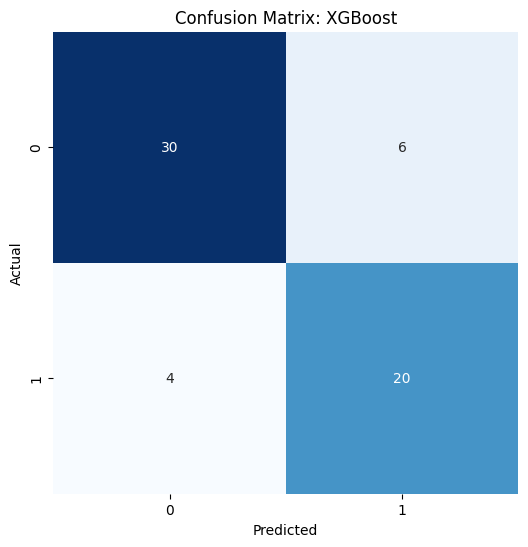

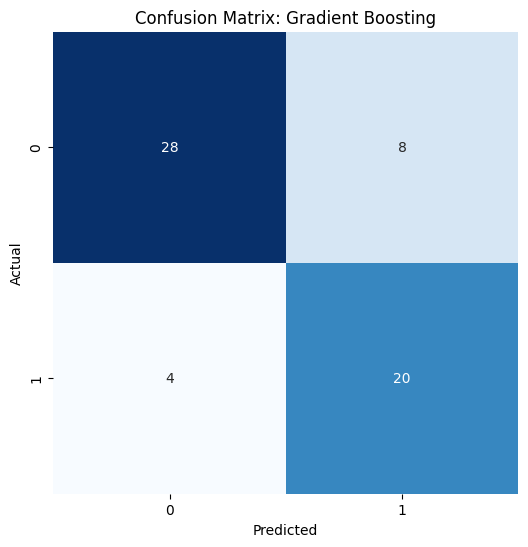

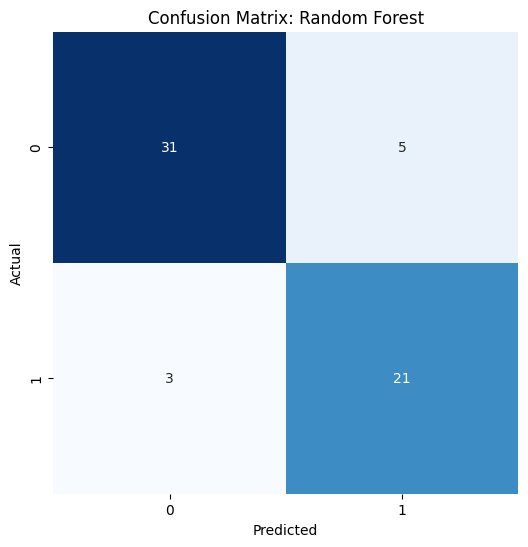

In [ ]:
# Create a dictionary to hold the metrics
model_metrics = {
    'Model': ['XGB', 'GradientBoosting', 'RandomForest'],
    'F1 Score': [],
    'Precision': [],
    'Recall': [],
    'Accuracy': [],
    'AUC Score': []
}

# List of predictions for iteration
predictions = [xgb_preds, gb_preds, rf_preds]

# Calculate metrics and classification reports
classification_reports = []

for i, preds in enumerate(predictions):
    model_metrics['F1 Score'].append(f1_score(y_test, preds))
    model_metrics['Precision'].append(precision_score(y_test, preds))
    model_metrics['Recall'].append(recall_score(y_test, preds))
    model_metrics['Accuracy'].append(accuracy_score(y_test, preds))
    # lr_fpr, lr_tpr, _ = roc_curve(y_test, preds)
    # # find area under curve score
    # model_metrics['AUC Score'].append(auc(lr_fpr, lr_tpr))

    auc = roc_auc_score(y_test, preds)
    model_metrics['AUC Score'].append(auc)

    # Save the classification report for each model
    report = classification_report(y_test, preds, output_dict=True)
    classification_reports.append(report)

# Convert metrics dictionary to DataFrame
metrics_df_balanced = pd.DataFrame(model_metrics)

# Save classification reports into separate variables
xgb_report, gb_report, rf_report = classification_reports

# Print the DataFrame of metrics
print(metrics_df_balanced)

# Plot heatmaps for the confusion matrices
models = [xgb, gb, rf]
model_names = ['XGBoost', 'Gradient Boosting', 'Random Forest']

for i, model in enumerate(models):
    preds = predictions[i]
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {model_names[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
for i in classification_reports:
  print(i)
  print()
  print()

{'0.0': {'precision': 0.8823529411764706, 'recall': 0.8333333333333334, 'f1-score': 0.8571428571428571, 'support': 36}, '1.0': {'precision': 0.7692307692307693, 'recall': 0.8333333333333334, 'f1-score': 0.8, 'support': 24}, 'accuracy': 0.8333333333333334, 'macro avg': {'precision': 0.8257918552036199, 'recall': 0.8333333333333334, 'f1-score': 0.8285714285714285, 'support': 60}, 'weighted avg': {'precision': 0.8371040723981902, 'recall': 0.8333333333333334, 'f1-score': 0.8342857142857143, 'support': 60}}


{'0.0': {'precision': 0.875, 'recall': 0.7777777777777778, 'f1-score': 0.823529411764706, 'support': 36}, '1.0': {'precision': 0.7142857142857143, 'recall': 0.8333333333333334, 'f1-score': 0.7692307692307692, 'support': 24}, 'accuracy': 0.8, 'macro avg': {'precision': 0.7946428571428572, 'recall': 0.8055555555555556, 'f1-score': 0.7963800904977376, 'support': 60}, 'weighted avg': {'precision': 0.8107142857142856, 'recall': 0.8, 'f1-score': 0.8018099547511313, 'support': 60}}


{'0.0':

In [ ]:
metrics_df_balanced

,Model,F1 Score,Precision,Recall,Accuracy,AUC Score
0,XGB,0.800000,0.769231,0.833333,0.833333,0.833333
1,GradientBoosting,0.769231,0.714286,0.833333,0.800000,0.805556
2,RandomForest,0.840000,0.807692,0.875000,0.866667,0.868056


# Differential Privacy

In [ ]:
from diffprivlib.models import RandomForestClassifier, KMeans, DecisionTreeClassifier
from diffprivlib.models import StandardScaler

## Test Train Split

In [ ]:
train, test = train_test_split(combined_data, test_size=0.20, random_state=42)

## Standardization

In [ ]:
X_train, y_train = train.drop('num', axis=1), train.num
X_test, y_test = test.drop('num', axis=1), test.num

In [ ]:
pd.set_option('display.max_rows', None)
print(X_train.dtypes)
pd.reset_option('display.max_rows')

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
dtype: object


In [ ]:
scaler = StandardScaler(bounds=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [ ]:
X_train.shape

(237, 13)

In [ ]:
y_train.shape

(237,)

In [ ]:
y_train

array([0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0.

## SMOTE - for balancing the dataset

In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now you can check the balance of the classes
unique, counts = np.unique(y_train, return_counts=True)
print("Before SMOTE:", dict(zip(unique, counts)))

unique_resampled, counts_resampled = np.unique(y_train_resampled, return_counts=True)
print("After SMOTE:", dict(zip(unique_resampled, counts_resampled)))

Before SMOTE: {0.0: 124, 1.0: 113}
After SMOTE: {0.0: 124, 1.0: 124}


## Grid Search to fine tune parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train_resampled = X_train_resampled.astype('float64')
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
y_train_resampled = y_train_resampled.astype('float64')

In [ ]:
X_train.dtype

dtype('float64')

In [ ]:
# Define the parameter grid
param_grid = {
    'epsilon': [0.1, 0.5, 1, 1.5],  # Adjust the epsilon values as per your privacy requirement
    'n_estimators': [10, 50, 100, 150],  # Number of trees in the forest
    'max_depth': [3, 5, 10],  # Maximum depth of the tree
    # Include other parameters as needed
}

# Initialize the differentially private RandomForestClassifier
dp_rf = RandomForestClassifier(bounds=(0, 1), classes=[0,1])

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dp_rf, param_grid=param_grid, cv=5)  # cv can be adjusted as per your requirement

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print best parameters
print("Best parameters found: ", grid_search.best_params_)

# Predict using the best model
dp_rf_best = grid_search.best_estimator_
dp_rf_preds = dp_rf_best.predict(X_test)

Best parameters found:  {'epsilon': 1.5, 'max_depth': 3, 'n_estimators': 10}


In [ ]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'epsilon': 1.5, 'max_depth': 3, 'n_estimators': 10}


## Evaluating the random forest model with different epsilon values

In [ ]:
# Epsilon values to iterate over
epsilon_values = [0.1, 0.5, 1, 1.5, 2]

# Store the results
results = []

# Iterate over each epsilon value
for epsilon in epsilon_values:
    # Initialize the differentially private RandomForestClassifier
    dp_rf = RandomForestClassifier(epsilon=epsilon, n_estimators=10, max_depth=3, bounds=(0,1), classes=[0,1])

    # Fit the model on the training data
    dp_rf.fit(X_train_resampled, y_train_resampled)

    # Predict on the test set
    preds = dp_rf.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average='binary')  # Adjust average as per your requirement
    precision = precision_score(y_test, preds, average='binary')
    recall = recall_score(y_test, preds, average='binary')
    auc = roc_auc_score(y_test, dp_rf.predict_proba(X_test)[:, 1])

    # Append results
    results.append({
        'epsilon': epsilon,
        'accuracy': accuracy,
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'auc': auc
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

   epsilon  accuracy  f1_score  precision    recall       auc
0      0.1  0.400000  0.470588   0.363636  0.666667  0.356481
1      0.5  0.783333  0.723404   0.739130  0.708333  0.823495
2      1.0  0.800000  0.739130   0.772727  0.708333  0.851273
3      1.5  0.783333  0.682927   0.823529  0.583333  0.886574
4      2.0  0.833333  0.782609   0.818182  0.750000  0.912037


In [ ]:
results_df

,epsilon,accuracy,f1_score,precision,recall,auc
0,0.1,0.400000,0.470588,0.363636,0.666667,0.356481
1,0.5,0.783333,0.723404,0.739130,0.708333,0.823495
2,1.0,0.800000,0.739130,0.772727,0.708333,0.851273
3,1.5,0.783333,0.682927,0.823529,0.583333,0.886574
4,2.0,0.833333,0.782609,0.818182,0.750000,0.912037


In [ ]:
"""
Intermediate Epsilon (e.g., ε = 0.5): This is often considered a middle ground, attempting to balance privacy and utility.
It provides moderate privacy protection while retaining a reasonable level of data accuracy.
"""

'\nIntermediate Epsilon (e.g., ε = 0.5): This is often considered a middle ground, attempting to balance privacy and utility.\nIt provides moderate privacy protection while retaining a reasonable level of data accuracy.\n'

# DP Models:

1. Random Forest Classifier
2. K-means
3. Decision Tree Classifier

In [ ]:
# Differentially Private RandomForestClassifier
dp_rf = RandomForestClassifier(epsilon= 0.5, max_depth= 3, n_estimators= 10, bounds=(0, 1), classes=[0,1])
dp_rf.fit(X_train_resampled, y_train_resampled)
dp_rf_preds = dp_rf.predict(X_test)

In [ ]:
# Differentially Private KMeans
dp_kmeans = KMeans(epsilon= 0.5, n_clusters=2, bounds=(0, 1))
dp_kmeans.fit(X_train_resampled)
dp_kmeans_preds = dp_kmeans.predict(X_test)

In [ ]:
# Differentially Private DecisionTreeClassifier
dp_dt = DecisionTreeClassifier(epsilon= 0.5, max_depth= 3, bounds=(0, 1), classes=[0,1])
dp_dt.fit(X_train_resampled, y_train_resampled)
dp_dt_preds = dp_dt.predict(X_test)

              Model  F1 Score  Precision    Recall  Accuracy  AUC Score
0  DP Random Forest  0.529412   0.900000  0.375000  0.733333   0.673611
1         DP Kmeans  0.298507   0.232558  0.416667  0.216667   0.250000
2  DP Decision Tree  0.723404   0.739130  0.708333  0.783333   0.770833


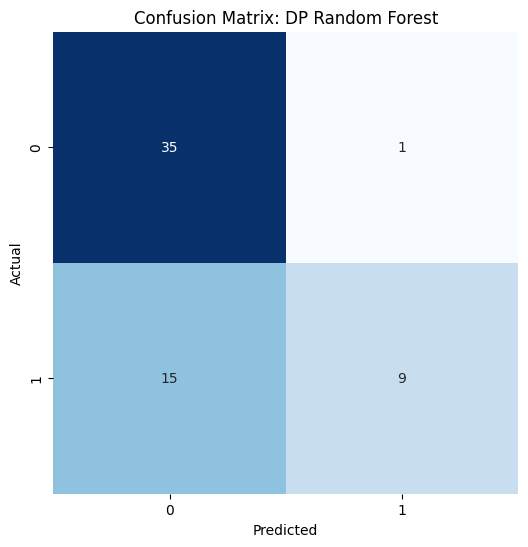

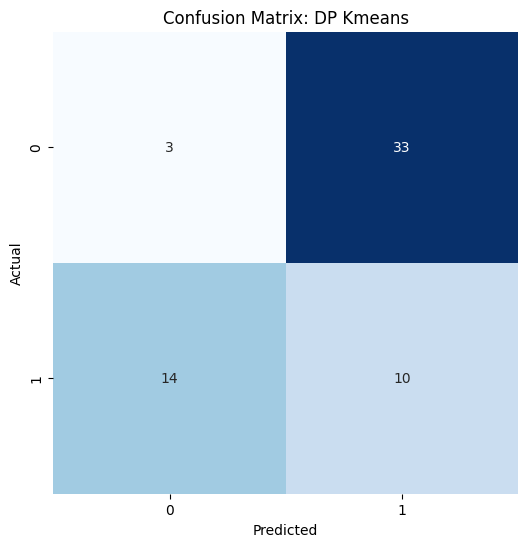

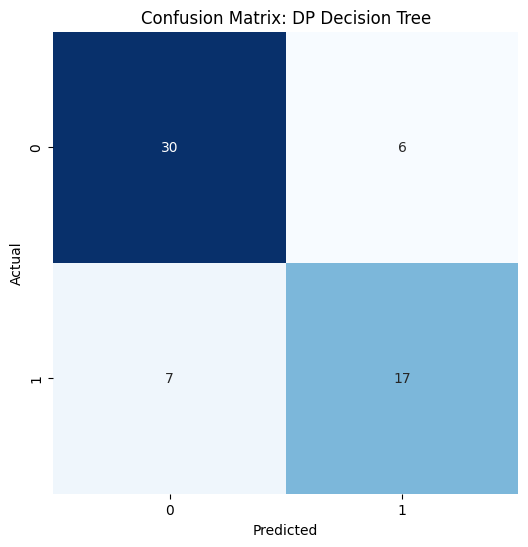

In [ ]:
# Create a dictionary to hold the metrics
model_metrics = {
    'Model': ['DP Random Forest', 'DP Kmeans', 'DP Decision Tree'],
    'F1 Score': [],
    'Precision': [],
    'Recall': [],
    'Accuracy': [],
    'AUC Score': []
}

# List of predictions for iteration
predictions = [dp_rf_preds, dp_kmeans_preds, dp_dt_preds]

# Calculate metrics and classification reports
classification_reports = []

for i, preds in enumerate(predictions):
    model_metrics['F1 Score'].append(f1_score(y_test, preds))
    model_metrics['Precision'].append(precision_score(y_test, preds))
    model_metrics['Recall'].append(recall_score(y_test, preds))
    model_metrics['Accuracy'].append(accuracy_score(y_test, preds))
    auc_score = roc_auc_score(y_test, preds)
    model_metrics['AUC Score'].append(auc_score)

    # Save the classification report for each model
    report = classification_report(y_test, preds, output_dict=True)
    classification_reports.append(report)

# Convert metrics dictionary to DataFrame
metrics_df_dp = pd.DataFrame(model_metrics)

# Save classification reports into separate variables
xgb_report, gb_report, rf_report = classification_reports

# Print the DataFrame of metrics
print(metrics_df_dp)

# Plot heatmaps for the confusion matrices
models = [dp_rf, dp_kmeans, dp_dt]
model_names = ['DP Random Forest', 'DP Kmeans', 'DP Decision Tree']

for i, model in enumerate(models):
    preds = predictions[i]
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {model_names[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [ ]:
metrics_df_dp

,Model,F1 Score,Precision,Recall,Accuracy,AUC Score
0,DP Random Forest,0.529412,0.900000,0.375000,0.733333,0.673611
1,DP Kmeans,0.298507,0.232558,0.416667,0.216667,0.250000
2,DP Decision Tree,0.723404,0.739130,0.708333,0.783333,0.770833


# Adversarial Attack : Membership inference Attack

In [ ]:
# Merge the train and test sets to form a single dataset
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

In [ ]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((297, 13), (297,), (237, 13), (237,), (60, 13), (60,))

## SMOTE - for balancing the dataset

In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

# Now you can check the balance of the classes
unique, counts = np.unique(y, return_counts=True)
print("Before SMOTE:", dict(zip(unique, counts)))

unique_resampled, counts_resampled = np.unique(y_train_resampled, return_counts=True)
print("After SMOTE:", dict(zip(unique_resampled, counts_resampled)))

Before SMOTE: {0.0: 160, 1.0: 137}
After SMOTE: {0.0: 160, 1.0: 160}


## Membership inference attack

In [ ]:
# Splitting the dataset into target model training and test sets
X_train_target, X_test_target, y_train_target, y_test_target = train_test_split(X_train_resampled, y_train_resampled, test_size=0.20)

# Training the differentially private target model (use the best parameters from your grid search)
dp_rf_target = RandomForestClassifier(epsilon=0.5, n_estimators=10, max_depth=20, bounds=(0, 1), classes=[0,1])
dp_rf_target.fit(X_train_target, y_train_target)

RandomForestClassifier(accountant=BudgetAccountant(spent_budget=[(1.0, 0), (1.0, 0), (0.1, 0), (0.5, 0), (1, 0), ...]),
                       bounds=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
                               array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])),
                       classes=[0, 1], epsilon=0.5, max_depth=20)

In [ ]:
# Training the shadow model on a different split
X_train_shadow, X_test_shadow, y_train_shadow, y_test_shadow = train_test_split(X_train_resampled, y_train_resampled, test_size=0.25)
shadow_model = RandomForestClassifier(epsilon=0.5, n_estimators=10, max_depth=20, bounds=(0, 1), classes=[0,1])
shadow_model.fit(X_train_shadow, y_train_shadow)

RandomForestClassifier(accountant=BudgetAccountant(spent_budget=[(1.0, 0), (1.0, 0), (0.1, 0), (0.5, 0), (1, 0), ...]),
                       bounds=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
                               array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])),
                       classes=[0, 1], epsilon=0.5, max_depth=20)

In [ ]:
# Generating 'in' and 'out' data for the attack model
in_data = shadow_model.predict_proba(X_train_shadow)
out_data = shadow_model.predict_proba(X_test_shadow)

# Labels for attack model training
in_labels = [1] * len(in_data)  # 1 for 'in'
out_labels = [0] * len(out_data)  # 0 for 'out'

In [ ]:
# Training the attack model
attack_X = np.concatenate([in_data, out_data])
attack_y = np.concatenate([in_labels, out_labels])
attack_model = RandomForestClassifier(epsilon=0.5, n_estimators=10, max_depth=20, bounds=(0, 1), classes=[0,1])
attack_model.fit(attack_X, attack_y)

RandomForestClassifier(accountant=BudgetAccountant(spent_budget=[(1.0, 0), (1.0, 0), (0.1, 0), (0.5, 0), (1, 0), ...]),
                       bounds=(array([0., 0.]), array([1., 1.])),
                       classes=[0, 1], epsilon=0.5, max_depth=20)

In [ ]:
# Using the attack model on the target model's predictions
target_predictions = dp_rf_target.predict_proba(X_test_target)
attack_preds = attack_model.predict(target_predictions)

# Calculating the accuracy of the attack model
attack_accuracy = accuracy_score(y_test_target, attack_preds)
print("Attack Model Accuracy: ", attack_accuracy)

Attack Model Accuracy:  0.484375


In [ ]:
# Accuracy
attack_accuracy = accuracy_score(y_test_target, attack_preds)
print("Attack Model Accuracy: ", attack_accuracy)

# Precision
attack_precision = precision_score(y_test_target, attack_preds, zero_division=True)
print("Attack Model Precision: ", attack_precision)

# Recall
attack_recall = recall_score(y_test_target, attack_preds)
print("Attack Model Recall: ", attack_recall)

# F1 Score
attack_f1 = f1_score(y_test_target, attack_preds)
print("Attack Model F1 Score: ", attack_f1)

# AUC
# AUC
attack_auc = roc_auc_score(y_test_target, attack_model.predict_proba(target_predictions)[:, 1])
print("Attack Model AUC Score: ", attack_auc)

Attack Model Accuracy:  0.484375
Attack Model Precision:  0.484375
Attack Model Recall:  1.0
Attack Model F1 Score:  0.6526315789473685
Attack Model AUC Score:  0.5977517106549365


In [ ]:
# Prepare the data for the DataFrame
data = {
    'Model Name': ['Target RF Model - Membership Inference Attack'],
    'Accuracy': [attack_accuracy],
    'Precision': [attack_precision],
    'Recall': [attack_recall],
    'F1 Score': [attack_f1],
    # Uncomment the following line if AUC is computed
    'AUC Score': [attack_auc]
}

# Create a DataFrame
attack_model_metrics_df = pd.DataFrame(data)

# Display the DataFrame
attack_model_metrics_df

,Model Name,Accuracy,Precision,Recall,F1 Score,AUC Score
0,Target RF Model - Membership Inference Attack,0.484375,0.484375,1.0,0.652632,0.597752
